In [11]:
import numpy as np
import pandas as pd
import os

In [6]:
import matplotlib.pyplot as plt
df_diabetes = pd.read_csv('/Users/vineelakolagani/Desktop/PDS3/data_raw/diabetes.csv')


In [12]:
# Set a seed for reproducibility
np.random.seed(42)

# Bootstrap resampling
num_bootstrap_samples = 500
sample_size = 150
bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []

for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(df_diabetes['BloodPressure'], size=sample_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_std_devs.append(np.std(bootstrap_sample))
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 50))

In [13]:
# Calculate population statistics
population_mean_bp = df_diabetes['BloodPressure'].mean()
population_std_dev_bp = df_diabetes['BloodPressure'].std()
population_percentile_bp = np.percentile(df_diabetes['BloodPressure'], 50)

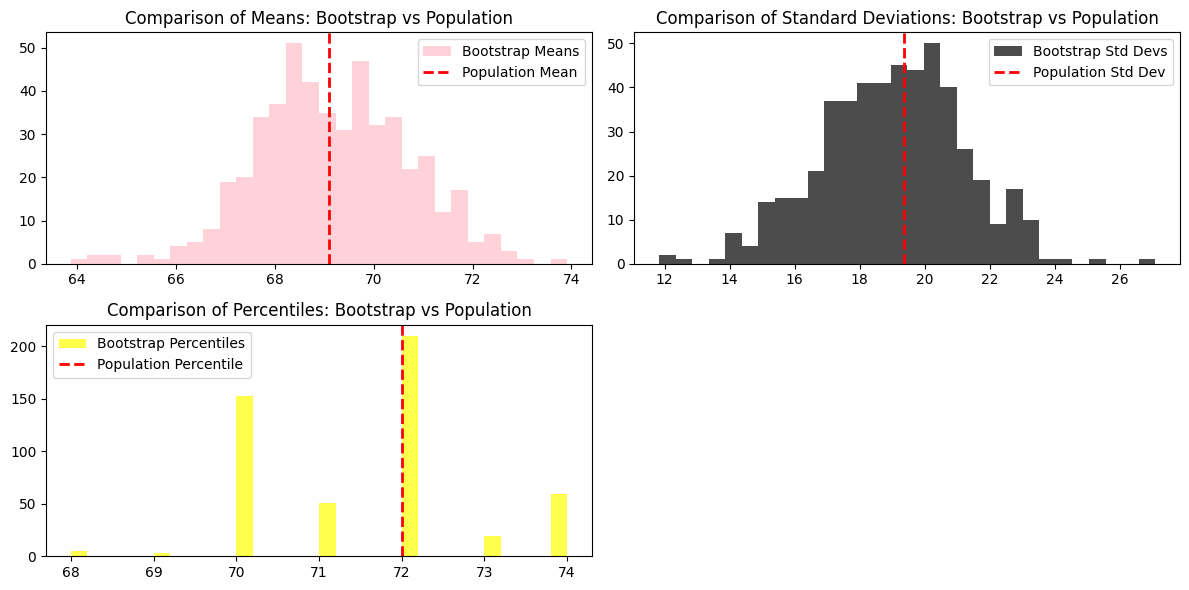

In [15]:
# Perform bootstrap
# Create charts for comparison
plt.figure(figsize=(12, 6))

# Mean comparison
plt.subplot(2, 2, 1)
plt.hist(bootstrap_means, bins=30, color='pink', alpha=0.7, label='Bootstrap Means')
plt.axvline(population_mean_bp, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Comparison of Means: Bootstrap vs Population')
plt.legend()

# Standard Deviation comparison
plt.subplot(2, 2, 2)
plt.hist(bootstrap_std_devs, bins=30, color='black', alpha=0.7, label='Bootstrap Std Devs')
plt.axvline(population_std_dev_bp, color='red', linestyle='dashed', linewidth=2, label='Population Std Dev')
plt.title('Comparison of Standard Deviations: Bootstrap vs Population')
plt.legend()

# Percentile (Median) comparison
plt.subplot(2, 2, 3)
plt.hist(bootstrap_percentiles, bins=30, color='yellow', alpha=0.7, label='Bootstrap Percentiles')
plt.axvline(population_percentile_bp, color='red', linestyle='dashed', linewidth=2, label='Population Percentile')
plt.title('Comparison of Percentiles: Bootstrap vs Population')
plt.legend()

plt.tight_layout()

# Create a 'results' directory if it doesn't exist
results_dir = '/Users/vineelakolagani/Desktop/PDS3/results'
os.makedirs(results_dir, exist_ok=True)

# Save the plots in the 'results' directory
plt.savefig(os.path.join(results_dir, 'bootstrap_plots.png'))
plt.show()
